# Neutrino Oscillations: Mathematical Basis <a class="anchor" id="top"></a>
Author: Lodovico <br>
Last update: 29/02

## Table of Contents

* [Introduction](#intro)
* [Define constants](#constants)
* [2-flavours](#2-flavours)
* [3-flavours](#3-flavours)
* [Probability function](#prob)
* [Neutrinos in matter (MSW effect)](#MSW)
* [References](#references)

## Introduction <a class="anchor" id="intro"></a>
In this notebook, I implement the mathematics of neutrino flavours as a superposition of mass eigenstates. Moreover, I introduce the time evolution of the different neutrino flavours, which leads to the phenomenon of neutrino oscillations. This is done both for the 2-flavours and 3-flavours cases. Finally, I calculate the probability that a neutrino alpha becomes a neutrino beta after a certain distance and given the energy at which it is produced.

Use this code as the basis of any future work, but please do not change anything before speaking to me (Lodovico) as we need to be careful to units, mathematics and experimental bounds. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Define constants <a class="anchor" id="constants"></a>

Note: we are assuming the normal ordering of the mass eigenstates, i.e. $m_1 < m_2 < m_3$.

### Mixing factors
We use the most recent data available [[3]](#3). Note that the angle $\theta_{13}$ and the CP-violating phase $\delta_{CP}$ have not been measured directly yet. In particular, a slider could be added so that the user can set the value of the phase.

### Mass differences
These are also the most recent values available [[3]](#3). Only the mass differences are known, not the values of the mass eigenstates themselves. Thus, we need to set a value of the mass $m_1$ and then we assume the mass hierarchy $m_1 < m_2 < m_3$ to find the other masses. The mass hierarchy is not know either. <br>
In future work, we should consider having a slider for the mass $m_1$ and the possibility to choose a mass hierarchy with which to work. <br>
It is important to note that the mass difference is defined in the following way:
$$ \Delta m_{12}^2 = m_2^2 - m_1^2 $$

### Energy values
For the energy values we use the energy of a neutrino produced inside the Sun in a proton-proton reaction [[1]](#1). We also have values for the energy of neutrinos produced in the atmosphere and in accelerators. <br>

### Majorana phases
We are neglecting possible Majorana phases.

### Values of important constants
The value of the equatioral radius of the Sun is taken from [[6]](#6). The radius of the solar core is approximated to be 12% of the radius of the sun.

### Electron density
Assume electron neutrinos are produced at centre of Sun. <br>
Mean molecular weight per electron is approximately constant for $0 \leq r \leq 0.12$ (in units of Sun radius), so the central value $\mu_e = 1.69$ is used.<br>
Values for the density of the sun are approximate and roughly averaged (bad approximation?).  <br>
Initially, the data had been based on figure 7 in [[7]](#7) However, better data is found in [[8]](#8), so that is now used.

In [38]:
# mixing factors (converted from degrees to radians)
th12 = np.radians(33.82)
th23 = np.radians(48.3)
th13 = np.radians(8.61)
delta_CP = np.radians(222)
#delta_CP = 0

# mass differences
dm21_sq = 7.39*10**(-5) # eV^2
dm31_sq = 2.523*10**(-3) # eV^2

# mass eigenstates
m1 = 0.01 # eV
m2 = np.sqrt(m1*m1 + dm21_sq) # eV
m3 = np.sqrt(m1*m1 + dm31_sq) # eV 

# total mass 
mtot = m1 + m2 + m3 #eV
assert mtot < 0.23, "Error: total mass not in agreement with experimental bounds"

# calculate third mass difference squared
dm32_sq = m3*m3 - m2*m2 # eV^2

# set energy values
E_sun_pp = 4*10**5 # eV 
E_atm = 10**11 # eV
E_acc = 10**9 #eV

# important constants:

# speed of light
c = 299792.458 # km s^-1 

# Planck constant
hbar = 6.582119569*10**(-16) # eV*s

# Astronomical unit (i.e. the distance between the Sun and the Earth)
AU = 149597870.700 # km

# Equatorial radius of the Sun
r_sun = 696342 # km
r_sun_core = 0.12*r_sun # km
# Volume sun and core
V_sun = 4*np.pi*r_sun*r_sun*r_sun / 3 # km^3
V_sun_core = 4*np.pi*r_sun_core*r_sun_core*r_sun_core / 3 # km^3
V_rest = V_sun - V_sun_core # km^3

# Electron density
N0 = 6.02214076*10**23 # Avogadro's number
mean_density_sun_core = 113*10**3 # kg m^-3
mean_mol_weight_e = 1.69 
e_density_sun_core = N0 * mean_density_sun_core / mean_mol_weight_e
print(e_density_sun_core)

4.026638496331361e+28


## Oscillation lengths
Derivation: <br>
$L_{osc} = \frac{4\pi \, E \, \hbar c}{\Delta m^2 \, c^4} = \frac{4\pi \, E \, \times \, 0.197 \, \times \, 10^9 \, \times \, 10^{-18} [eV] [km]}{\Delta m^2 \, c^4} = 4\pi \, \times \, 0.197 \, \times \, 10^{-9} \, \times \, \frac{E \, [eV] [km]}{\Delta m^2 \, c^4} \frac{[eV]}{[eV]} \approx 2.48 \, \times \, 10^{-9} \frac{E}{[eV]} \frac{[eV^2]}{\Delta m^2 \, c^4} [km]$. <br>
Thus, $\frac{L_{osc}}{[km]} = 2.48 \, \times \, 10^{-9} \frac{E}{[eV]} \frac{[eV^2]}{\Delta m^2 \, c^4}$.

In [39]:
def oscL(E, dm_sq):
    """Calculates oscillation length from one mass eigenstate i to another mass eigenstate j
    Takes as inputs the energy of the neutrino E in eV and the difference in mass squared between the two mass eigenstates in eV
    Returns the oscillation length in kilometers"""
    
    L = (2.48*10**(-9)) * E / np.abs(dm_sq)
    
    return L

# for solar neutrinos
print('The oscillation length of the mass eigenstates m1 and m2 is', oscL(E_sun_pp, dm21_sq), 'km')
print('The oscillation length of the mass eigenstates m2 and m3 is', oscL(E_sun_pp, dm32_sq), 'km')
print('The oscillation length of the mass eigenstates m1 and m3 is', oscL(E_sun_pp, dm31_sq), 'km')

The oscillation length of the mass eigenstates m1 and m2 is 13.423545331529093 km
The oscillation length of the mass eigenstates m2 and m3 is 0.4055435182535464 km
The oscillation length of the mass eigenstates m1 and m3 is 0.39365079365079364 km


## 2-flavours case <a class="anchor" id="2-flavours"></a>

We start with the simpler case of 2-flavours oscillations, to then generalise to the 3-flavours case. <br>
The math used is taken from [[2]](#2).

### 2-flavours rotational matrix

In [40]:
#rotational matrix for 2-flavours case
th2f = th12 # set angle for 2-flavours (arbitrary)
rot_mat_2f = np.array([[np.cos(th2f), np.sin(th2f)], [-np.sin(th2f), np.cos(th2f)]])

mar_2f = np.array([m1, m2]) #mass eigenstates vector

## 3-flavours case <a class="anchor" id="3-flavours"></a>
The math used is taken from [[2]](#2) and [[4]](#4). Note that we are neglecting possible Majorana phases.

<u> Important </u>: there is a mistake in the NPP notes, i.e. reference [[2]](#2), as in the third matrix there should be a negative sign in front of the sine in the second row. 

### 3-flavour rotational matrix

In [41]:
# mass eigenstates vector
mar_3f = np.array([m1, m2, m3]) 

#rotational matrix
U1 = np.array([[1, 0, 0], [0, np.cos(th23), np.sin(th23)], [0, -np.sin(th23), np.cos(th23)]]) #first matrix
U2 = np.array([[np.cos(th13), 0, np.sin(th13)*np.exp(-1j*delta_CP)], [0, 1, 0], 
               [-np.sin(th13)*np.exp(1j*delta_CP), 0, np.cos(th13)]]) #second matrix
U3 = np.array([[np.cos(th12), np.sin(th12), 0], [-np.sin(th12), np.cos(th12), 0], [0, 0, 1]]) #third matrix
rot_mat_3f = np.dot(U1, np.dot(U2, U3)) #final matrix
print(rot_mat_3f)

# check that the 3x3 matrix is unitary
herm = np.transpose(np.conjugate(rot_mat_3f))
print(np.dot(herm, rot_mat_3f))

[[ 0.82142745+0.j          0.55031308+0.j         -0.11125466+0.10017415j]
 [-0.30124644+0.06213799j  0.59890077+0.04162918j  0.73822377+0.j        ]
 [ 0.47705486+0.05536293j -0.57910682+0.03709025j  0.65773339+0.j        ]]
[[ 1.00000000e+00+0.00000000e+00j -6.15826834e-17-2.60208521e-18j
  -2.18850227e-17-1.38777878e-17j]
 [-6.15826834e-17+2.60208521e-18j  1.00000000e+00+0.00000000e+00j
   1.29986729e-17-6.93889390e-18j]
 [-2.18850227e-17+1.38777878e-17j  1.29986729e-17+6.93889390e-18j
   1.00000000e+00+0.00000000e+00j]]


## Probability function <a class="anchor" id="prob"></a>

### 2-flavours probability function ($\alpha \neq \beta$)
Calculates probability of transition from an initial neutrino of flavour $\alpha$ to a neutrino of flavour $\beta$, where $\alpha, \beta = e, \mu, \tau$, in the 2-flavour approximation. However, $\alpha \neq \beta$. Uses formula given in page 27 of [[2]](#2).

In [42]:
def prob_transition(alpha, beta, E, L):
    """Calculates the probability of a transition between an initial neutrino alpha to a neutrino beta
    Takes as inputs the initial and final neutrino flavours alpha and beta, 
    the energy at which the neutrino is produced E (in eV),
    and the distance travelled by the particle L (in km)
    Returns the probability of the transition"""
    
    if (alpha == "electron" and beta == "muon") or (alpha == "muon" and beta == "electron"): 
        ar = np.array([th12, dm21_sq])
    elif (alpha == "electron" and beta == "tau") or (alpha == "tau" and beta == "electron"):
        ar = np.array([th13, dm31_sq])
    elif (alpha == "muon" and beta == "tau") or (alpha == "tau" and beta == "muon"):
        ar = np.array([th23, dm32_sq])
    else:
        return "Error"
        
    arg = 1.27*ar[1]*L/(E*10**(-9))
        
    P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
    
    return P

#test:
pmn_test = prob_transition("electron", "muon", E_sun_pp, AU)*100
ptn_test = prob_transition("electron", "tau", E_sun_pp, AU)*100
print('The probability that the electron neutrino remains such is %.2f' % (100 - pmn_test - ptn_test), '%')
print('The probability that the electron neutrino becomes a muon neutrino is %.2f' % pmn_test, '%')
print('The probability that the electron neutrino becomes a tau neutrino is %.2f' % ptn_test, '%')

The probability that the electron neutrino remains such is 46.62 %
The probability that the electron neutrino becomes a muon neutrino is 53.19 %
The probability that the electron neutrino becomes a tau neutrino is 0.20 %


### 3-flavours probability function
Includes case $\alpha = \beta$. 

In [43]:
def full_prob(L, E, alpha):
    """Calculates the probability of a neutrino of flavour alpha to remain of that same flavour or to change into another
    flavour
    Takes as inputs the distance L (in kilometers), the energy at which the neutrino is created E (in eV), 
    and the initial flavour alpha ("electron", "muon", or "tau")
    Returns an array with three elements respectively representing the probability of the neutrino being an electron, muon
    or tau neutrino"""
    
    # transform from string to integer
    if alpha == "electron":
        a = 0
    elif alpha == "muon":
        a = 1
    elif alpha == "tau":
        a = 2
    else:
        print('Error: choose from "electron", "muon" or "tau"')
        
    # calculate X_{ij} (argument of sine squared)
    X = np.zeros((3, 3)) #store
    for i in range(3):
        for j in range(3):
            X[i, j] = 1267000000*(mar_3f[i]*mar_3f[i] - mar_3f[j]*mar_3f[j]) * L / (4*E)
        
    # calculate probabilities
    U = rot_mat_3f 
    vals = np.zeros(3) #store
    for b in range(3): 
        sum_re_parts = 0
        sum_im_parts = 0
        for i in range(3):
                for j in range(i):
                    term = np.conj(U[a, i])*U[b, i]*U[a, j]*np.conj(U[b, j])
                    re_part = np.real(term)*np.sin(X[i,j])*np.sin(X[i,j])
                    im_part = np.imag(term)*np.sin(2*X[i,j])
                    sum_re_parts += re_part
                    sum_im_parts += im_part
        if b == a:
            vals[b] = 1 - 4*sum_re_parts + 2*sum_im_parts
        else:
            vals[b] = - 4*sum_re_parts + 2*sum_im_parts
            
    return vals

# test
arp = [full_prob(AU, E_sun_pp, i)*100 for i in ["electron", "muon", "tau"]]
print(arp)
print(np.sum(arp[0]), np.sum(arp[1]), np.sum(arp[2]))

[array([39.08698893, 17.69120112, 43.22180995]), array([17.83674021, 76.32103288,  5.84222691]), array([43.07627086,  5.987766  , 50.93596314])]
100.00000000000001 99.99999999999999 100.0


#### Plot probability of electron neutrino changing flavour or staying the same as function of distance

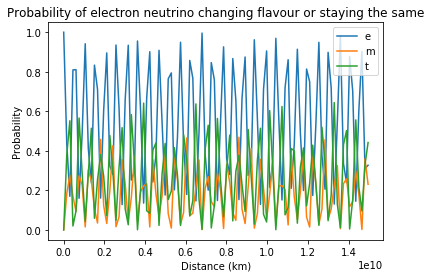

In [44]:
arL = np.linspace(0, 100*AU, 100)

arP = np.zeros((np.size(arL), 3))
for i,L in enumerate(arL):
    arP[i] = full_prob(L, E_sun_pp, "electron")
    
plt.plot(arL, arP)
plt.title("Probability of electron neutrino changing flavour or staying the same")
plt.ylabel("Probability")
plt.xlabel("Distance (km)")
plt.legend("e" "m" "t")

## Neutrinos in matter (MSW effect) <a class="anchor" id="MSW"></a>
Simple case of oscillations between two neutrino species and assuming constant matter density. <br>
Mathematics from [[4]](#4); value of the Fermi constant from [[5]](#5) (converted manually from $GeV^{-2}$ to $eV \times m^3$).

In [50]:
def prob_MSW_sun(E, L, Ne):
    """Calculates the probability of a transition between an initial electron neutrino to a muon neutrino inside the Sun
    considering the MSW effect
    Takes as inputs the energy at which the neutrino is produced E (in eV), the distance travelled by the particle L (in km),
    and the electron density Ne (in m^-3)
    Returns the probability of the transition"""
    
    ar = np.array([th12, dm21_sq])
    
    # Fermi constant
    Gf = 1.1663787*10**(-23) # eV m^3
    
    sin2th_sq = np.sin(2*ar[0])*np.sin(2*ar[0])
    cos2th = np.cos(2*ar[0])
    
    ### general:
    #x = 2*np.sqrt(2)*Gf*Ne*E/ar[1]
    ### at resonance: 
    x = cos2th
    
    # effective mixing angle
    sin2th_eff_sq = sin2th_sq / (sin2th_sq + (cos2th - x)*(cos2th - x))

    #effective mass difference squared
    eff_dm_sq = ar[1]*np.sqrt(sin2th_sq + (cos2th - x)*(cos2th - x))
    
    #argument of second sine squared
    arg = 1.27*eff_dm_sq*L/(E*10**(-9))
        
    P_muon = sin2th_eff_sq*np.sin(arg)*np.sin(arg)
    
    P_elec = 1 - P_muon
    
    P = np.array([P_elec, P_muon])
    
    return P

#test:
p_sun_core = prob_MSW_sun(E_sun_pp, r_sun_core, e_density_sun_core)*100
print('The survival probability of the electron neutrino is %.2f' % p_sun_core[0], '%')
print('The probability that the electron neutrino becomes a muon neutrino is %.2f' % p_sun_core[1], '%')

The survival probability of the electron neutrino is 7.88 %
The probability that the electron neutrino becomes a muon neutrino is 92.12 %


## References <a class="anchor" id="references"></a>

[1] <a class="anchor" id="1"></a> Wikipedia, <i> Solar neutrino </i>,
https://en.wikipedia.org/wiki/Solar_neutrino <br>
[2] <a class="anchor" id="2"></a> Dr Emily Nurse, Dr Andreas Korn, Nuclear and Particle Physics notes, pp. 25-28 <br>
[3] <a class="anchor" id="3"></a> http://www.nu-fit.org/ <br>
[4] <a class="anchor" id="4"></a> https://www.nobelprize.org/uploads/2018/06/advanced-physicsprize2015.pdf <br>
[5] <a class="anchor" id="5"></a> https://physics.nist.gov/cgi-bin/cuu/Value?gf <br>
[6] <a class="anchor" id="6"></a> https://arxiv.org/pdf/1203.4898.pdf <br>
[7] <a class="anchor" id="7"></a> Rosen, S.P., and Gelb, J.M. Mikheyev-Smirnov-Wolfenstein enhancement of oscillations as a possible solution to the solar-neutrino problem. United States: N. p., 1986. Web. doi:10.1103/PhysRevD.34.969 <br>
[8] <a class="anchor" id="8"></a> https://iopscience.iop.org/article/10.1088/0004-637X/765/1/14/meta

##### Return to top
[click here](#top)